In [1]:
# !pip install tensorflow-macos==2.10.0

In [26]:
# packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import layers, models, metrics
from tensorflow import image
from sklearn.preprocessing import LabelBinarizer

import tensorflowjs as tfjs

## Data Load

In [35]:
def get_data(folder_name, max_image_cnt = None):
    X     = []
    label = []
    list_sub_dir = os.listdir(folder_name)
    list_sub_dir = [folder for folder in list_sub_dir if folder[0]!='.' ]
    
    for sub_folder in list_sub_dir:

        print(sub_folder)
        
        list_item = os.listdir(f"{folder_name}/{sub_folder}/")
        
        if not max_image_cnt:
            max_image_cnt = len(list_item)
            
        for idx in range(max_image_cnt):
            item = list_item[idx]
            
            img = mpimg.imread(f"{folder_name}/{sub_folder}/{item}")
            if len(X) == 0:
                X = np.array(img)
                img_shape = np.prod(X.shape)
                X = np.reshape(X,(1,img_shape))
                label.append(sub_folder)
            else:
                X = np.concatenate((X,np.reshape(np.array(img),(1,img_shape))),axis=0)
                label.append(sub_folder)

        
    X = pd.DataFrame(X)
    X['label'] = label
    
    return X

In [33]:
new_img = mpimg.imread("../raw_data/asl_dataset/1/hand1_1_bot_seg_1_cropped.jpeg")
X = get_data("/Users/franciskaenglert/code/evaenglert/sign-model/raw_data/asl_dataset/", max_image_cnt = 10)


r
u
9
0
7
i
n
g
6
z
1
8
t
s
a
f
o
h
m
j
c
d
v
q
4
x
3
e
b
k
l
2
y
5
p
w


In [37]:
X

,0,1,2,3,4,5,6,7,8,9,...,479991,479992,479993,479994,479995,479996,479997,479998,479999,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,r
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,r
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,r
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,r
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,w
356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,w
357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,w
358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,w


In [36]:
X.to_csv('../data/processed.csv')

KeyboardInterrupt: 

In [5]:
df_test = pd.read_csv("../raw_data/archive/sign_mnist_test/sign_mnist_test.csv")
df_train = pd.read_csv("../raw_data/archive/sign_mnist_train/sign_mnist_train.csv")
df_train['label'] = df_train['label'].apply(lambda x: alphabet[x])
df_test['label'] = df_test['label'].apply(lambda x: alphabet[x])
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,G,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,F,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,K,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,A,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,D,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
df_train['label'].nunique()

24

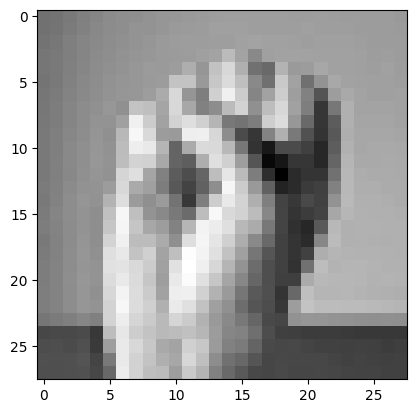

In [7]:
plt.imshow(df_train.drop(['label'], axis=1).iloc[10].values.reshape(28, -1), cmap='gray')

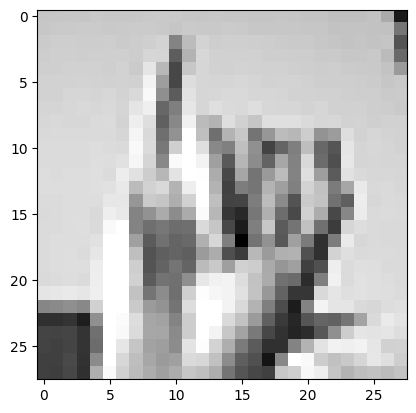

In [8]:
plt.imshow(df_test.drop(['label'], axis=1).iloc[10].values.reshape(28, -1), cmap='gray')

## Exploration

In [9]:
df_test[['label', 'pixel1']].groupby('label').count()

,pixel1
label,
A,331
B,432
C,310
D,245
E,498
F,247
G,348
H,436
I,288


## Model Creation

In [1]:
from tensorflow.keras import applications

In [20]:
mobile = applications.mobilenet.MobileNet(input_shape=(28,28,3), include_top = False)

ValueError: Input size must be at least 32x32; Received: input_shape=(28, 28, 3)

In [12]:
model = models.Sequential([
    mobile, 
    layers.Flatten(),
    layers.Dense(24, activation='softmax')
])

In [13]:
X_train_raw = df_train.drop(['label'], axis=1)
X_train = []
for i, row in X_train_raw.iterrows():
    X_train.append(np.array([row]).reshape(28, 28, 1))

X_train = np.array(X_train)    
y_train = np.array(df_train['label']).reshape(-1, 1)
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)


X_test_raw = df_test.drop(['label'], axis=1)
X_test = []
for i, row in X_test_raw.iterrows():
    X_test.append(np.array([row]).reshape(28, 28, 1))

X_test = np.array(X_test)    
y_test = np.array(df_test['label']).reshape(-1, 1)
y_test = lb.fit_transform(y_test)

In [73]:
# model = models.Sequential()

# model.add(layers.Conv2D(3, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
# # model.add(layers.Dropout(0.2))
# # model.add(layers.Conv2D(2, kernel_size=(2,2), activation='relu', input_shape=(28,28,1)))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(24, activation='softmax'))


In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy', metrics.Precision(),  metrics.Recall()])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 24)                24024     
                                                                 
Total params: 4,277,888
Trainable params: 4,256,000
Non-trainable params: 21,888
_________________________________________________________________


In [17]:
model.fit(X_train, y_train, batch_size=256, epochs=5, validation_split=0.3)

Epoch 1/5


2023-05-15 17:44:14.440300: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


ValueError: in user code:

    File "/Users/franciskaenglert/.pyenv/versions/sign-model/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/Users/franciskaenglert/.pyenv/versions/sign-model/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/franciskaenglert/.pyenv/versions/sign-model/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/Users/franciskaenglert/.pyenv/versions/sign-model/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/Users/franciskaenglert/.pyenv/versions/sign-model/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/franciskaenglert/.pyenv/versions/sign-model/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 28, 28, 1)


In [77]:
model.evaluate(X_train, y_train)

858/858 [==============================] - 1s 835us/step - loss: 9.6678 - accuracy: 0.4028 - precision_12: 0.4089 - recall_12: 0.3973


[9.6677827835083, 0.40280458331108093, 0.40894436836242676, 0.3973411023616791]

In [ ]:
models.save_model(model, 'saved_model.h5')

In [ ]:
for node in model.outputs:
    print(node.name)

In [ ]:
with open('../../cam-app/saved_model/labels.json', 'w') as f:
    json.dump(list(lb.classes_), f)

In [ ]:
tfjs.converters.save_keras_model(model, '../../cam-app/saved_model/')